In [3]:
#ASK 
import numpy as np

block_length = 10000
snr_db = np.arange(1, 15, 1)
ber_results = []

for snr_db_value in snr_db:
    snr = 10 ** (snr_db_value * 0.1)
    sys = np.random.randint(0, 2, block_length)
    noise = np.random.normal(0, 1, block_length)
    
    transmitted_bits = sys * np.sqrt(snr)
    received_bits = transmitted_bits + noise
    decoded_bits = (received_bits>((snr)**0.5/2))

    bit_errors = np.sum(decoded_bits != sys)

    ber = bit_errors / block_length
    ber_results.append(ber)

for snr_db_value, ber in zip(snr_db, ber_results):
    print(f"SNR (dB): {snr_db_value}, Bit Error Rate: {ber:.4f}")

SNR (dB): 1, Bit Error Rate: 0.2839
SNR (dB): 2, Bit Error Rate: 0.2589
SNR (dB): 3, Bit Error Rate: 0.2449
SNR (dB): 4, Bit Error Rate: 0.2164
SNR (dB): 5, Bit Error Rate: 0.1854
SNR (dB): 6, Bit Error Rate: 0.1583
SNR (dB): 7, Bit Error Rate: 0.1330
SNR (dB): 8, Bit Error Rate: 0.1044
SNR (dB): 9, Bit Error Rate: 0.0789
SNR (dB): 10, Bit Error Rate: 0.0536
SNR (dB): 11, Bit Error Rate: 0.0351
SNR (dB): 12, Bit Error Rate: 0.0249
SNR (dB): 13, Bit Error Rate: 0.0133
SNR (dB): 14, Bit Error Rate: 0.0054


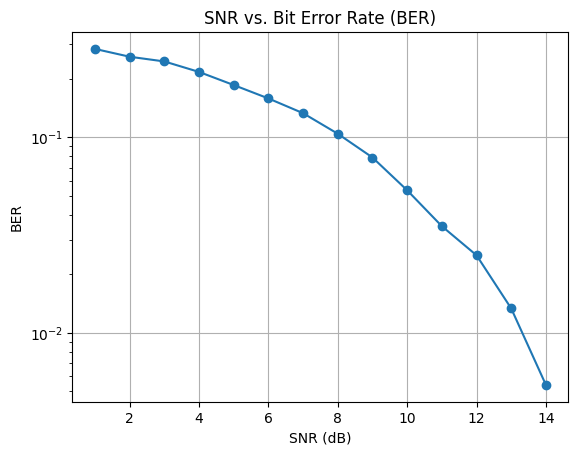

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogy(snr_db, ber_results, marker='o', linestyle='-')
plt.title('SNR vs. Bit Error Rate (BER)')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.show()

[0.1309272967555245, 0.10402863708538868, 0.07889587198172432, 0.05649530174936168, 0.0376789881474634, 0.023007138877865985, 0.012587033122144597, 0.006004386400163542, 0.002413310419633885, 0.0007827011290012509, 0.0001939854720578449, 3.430262386638905e-05, 3.969248396296088e-06, 2.695148116904633e-07]


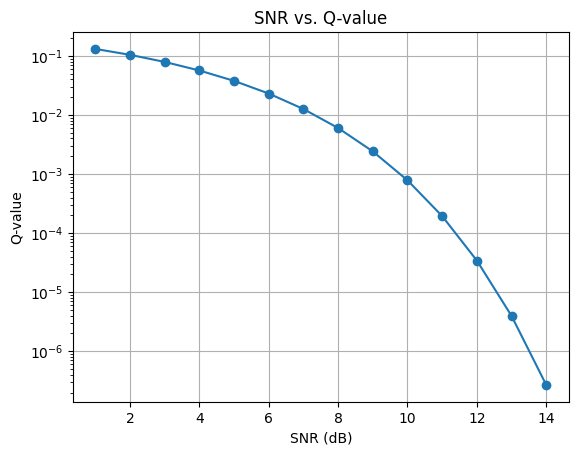

In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

snr_db = np.arange(1, 15, 1)
q_values = []

for snr_db_value in snr_db:
    snr = 10 ** (snr_db_value * 0.1)
    q = 1 - norm.cdf(np.sqrt(snr))
    q_values.append(q)
print(q_values)
plt.figure()
plt.semilogy(snr_db, q_values, marker='o', linestyle='-')
plt.title('SNR vs. Q-value')
plt.xlabel('SNR (dB)')
plt.ylabel('Q-value')
plt.grid(True)
plt.show()